In [1]:
cd ../TileEM/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM


In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
from TileEM_plot_toolbox import *

Populating the interactive namespace from numpy and matplotlib


In [3]:
cd final_all_tiles/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM/final_all_tiles


In [4]:
df = pd.read_csv("worker_obj_qualities.csv")
df =df[df["Precision"]!=-1]
df =df[df["Recall"]!=-1]

In [27]:
def bucketize(data,Nbuckets):
    delta = (max(data)-min(data))/Nbuckets
    bucketized_data = []
    start=0
    end=delta
    for val in data:
        start=0
        end=delta
        #print "val: ",val
        for i in range(Nbuckets+2):
            #print start,end
            if val>=start and val<end:
                #print"added"
                bucketized_data.append(start)
                break
            else:
                start=end
                end+=delta
    #print len(bucketized_data),len(data)
    assert len(bucketized_data)==len(data)
    return bucketized_data

In [6]:
def scatterplot(x_attr,y_attr,z_attr,z_data="",bucketize=True):
    fig=plt.figure()

    cmap = plt.cm.rainbow
    plt.xlim(0,1.03)
    plt.ylim(0,1.03)
    plt.xlabel(x_attr,fontsize=14)
    plt.ylabel(y_attr,fontsize=14)
    plt.title(z_attr,fontsize=15)
    if bucketize:
        bounds = sort(list(set(bucketized_data)))
        norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
        plt.scatter(df[x_attr],df[y_attr],c=z_data,edgecolors='none',alpha=0.7,cmap=cmap,norm=norm)        
        ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
        matplotlib.colorbar.ColorbarBase(ax2,cmap=cmap, norm=norm, spacing='proportional', ticks=bounds, boundaries=bounds)#, format='%1i')
    else:
        plt.scatter(df[x_attr],df[y_attr],c=df[z_attr],edgecolors='none',alpha=0.7,cmap=cmap)
        plt.colorbar()
        plt.clim(0,1)

In [7]:
# b = plt.hist(df[z_attr])
# a = plt.hist(bucketized_data)

#### PR scatterplot with z=Q1 continuous

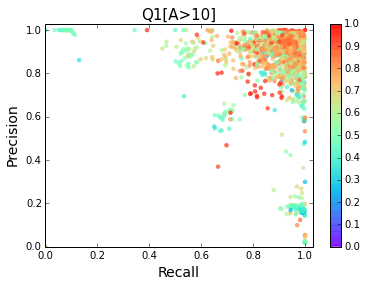

In [8]:
scatterplot("Recall","Precision","Q1[A>10]",bucketize=False)

#### PR scatterplot with z=Q1 bucket = 5 

1785 1785


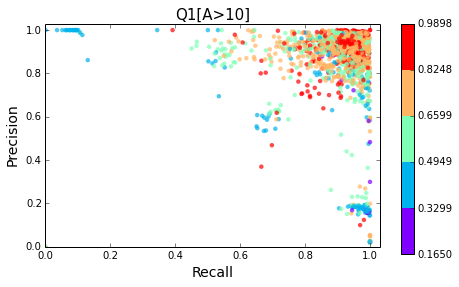

In [9]:
z_attr="Q1[A>10]"
bucketized_data = bucketize(df[z_attr],5)
scatterplot("Recall","Precision",z_attr,bucketized_data,bucketize=True)

#### PR scatterplot with z=Q1 bucket = 3

1785 1785


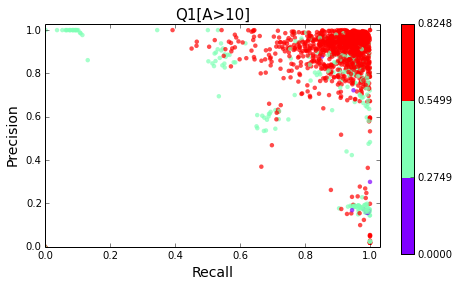

In [10]:
z_attr="Q1[A>10]"
bucketized_data = bucketize(df[z_attr],3)
scatterplot("Recall","Precision",z_attr,bucketized_data,bucketize=True)

$\therefore$ Qualitatively, Q1 high for good workers, bad for bad workers, but note that there is a spread and some purple (bad Q1) that have decent PR.

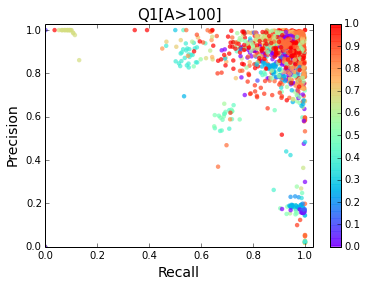

In [15]:
scatterplot("Recall","Precision","Q1[A>100]",bucketize=False)

When you increase the area threshold, there are more good workers who have low Q1 because they didn't pick one of the large area tiles '

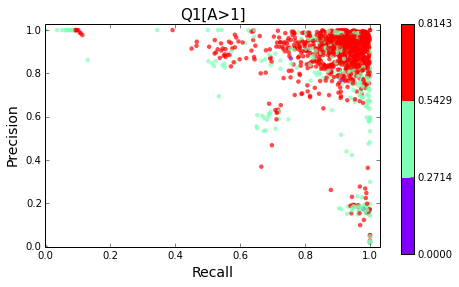

In [112]:
z_attr="Q1[A>1]"
bucketized_data = bucketize(df[z_attr],3)
scatterplot("Recall","Precision",z_attr,bucketized_data,bucketize=True)

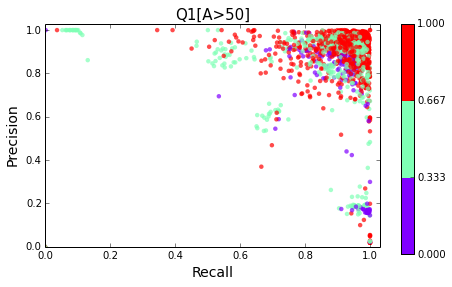

In [30]:
z_attr="Q1[A>50]"
bucketized_data = bucketize(df[z_attr],3)
scatterplot("Recall","Precision",z_attr,bucketized_data,bucketize=True)

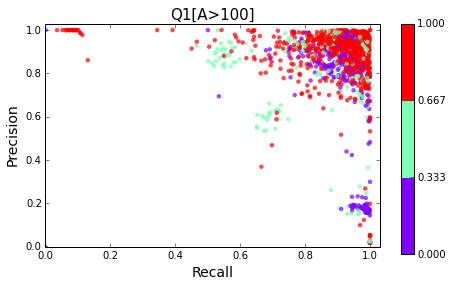

In [28]:
z_attr="Q1[A>100]"
bucketized_data = bucketize(df[z_attr],3)
scatterplot("Recall","Precision",z_attr,bucketized_data,bucketize=True)

### How are Q1, Q2 correlated and how does that relationship change with a*? 

$\therefore$ for small A*, strong correlation between Q1 and Q2. Because the tiles are generally small, if a worker is good, he would likely get most of the small and big tiles A~1 correctly. But when the area threshold is high, small tiles are more or less guessing (variance is ~uniform across all Q1s)

---------------------------------------------
Regression x=['Q1[A>1]'];y=['Q2[A<1]']
Coefficients:  [[ 0.78502869]]
Mean squared error: 0.01
R^2: 0.62
---------------------------------------------
Regression x=['Q1[A>10]'];y=['Q2[A<10]']
Coefficients:  [[ 0.30169736]]
Mean squared error: 0.01
R^2: 0.21
---------------------------------------------
Regression x=['Q1[A>50]'];y=['Q2[A<50]']
Coefficients:  [[ 0.10120454]]
Mean squared error: 0.01
R^2: 0.07
---------------------------------------------
Regression x=['Q1[A>100]'];y=['Q2[A<100]']
Coefficients:  [[ 0.07946036]]
Mean squared error: 0.01
R^2: 0.03


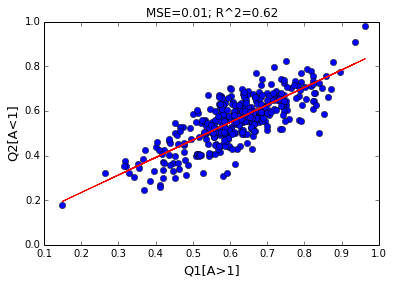

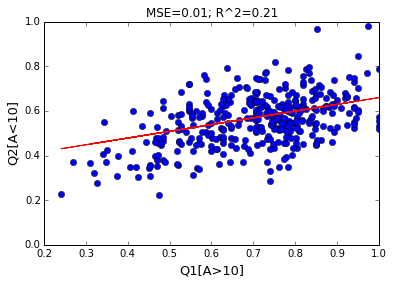

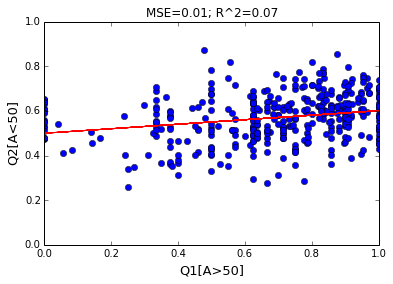

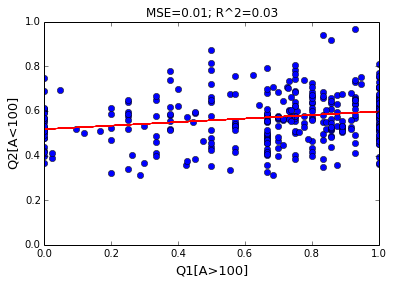

In [38]:
for astar in [1,10,50,100]:
    regression_results( ["Q1[A>{}]".format(astar)],["Q2[A<{}]".format(astar)],PLOT=True)

## Jaccard index: accounts for both P and R characteristics 

In [40]:
df.head()

,object_id,worker_id,Qj,Q1[A>1],Q2[A<1],Q1[A>10],Q2[A<10],Q1[A>50],Q2[A<50],Q1[A>100],Q2[A<100],Precision,Recall
0,1,75,0.492954,0.452618,0.502315,0.500000,0.492850,0.375,0.493176,0.25,0.493183,0.185230,0.951235
1,1,114,0.348286,0.320449,0.354745,0.419355,0.347235,0.375,0.348235,0.25,0.348378,0.183556,0.992826
2,1,116,0.641146,0.593516,0.652199,0.483871,0.643470,0.375,0.641647,0.25,0.641514,0.190723,0.962686
3,1,118,0.466416,0.498753,0.458912,0.483871,0.466158,0.375,0.466588,0.25,0.466620,0.187262,0.949083
4,1,133,0.268436,0.265586,0.269097,0.193548,0.269542,0.125,0.268706,0.25,0.268453,0.174196,0.980233


In [54]:
def compute_worker_lst_jaccard_obj(objid,worker_lst,EXCLUDE_BBG=True):
    # List of Jaccard Index (IOU) of given list of workers
    jaccard_lst = []

    objBBs = bb_info[bb_info.object_id==objid]
    ground_truth_match = my_BBG[my_BBG.object_id==objid]
    BBG_x_locs,BBG_y_locs =  process_raw_locs([ground_truth_match["x_locs"].iloc[0],ground_truth_match["y_locs"].iloc[0]])
    for worker_id in worker_lst:
        bb = objBBs[objBBs["worker_id"]==worker_id]
        oid = bb["object_id"]
        bbx_path= bb["x_locs"].values[0]
        bby_path= bb["y_locs"].values[0]
        worker_x_locs,worker_y_locs= process_raw_locs([bbx_path,bby_path])
        jaccard = intersection([worker_x_locs,BBG_x_locs],[worker_y_locs,BBG_y_locs])/union([worker_x_locs,BBG_x_locs],[worker_y_locs,BBG_y_locs])
        jaccard_lst.append(jaccard)
    return jaccard_lst

In [62]:
Qj=pkl.load(open("Qj.pkl",'r'))
worker_obj_tbl = Qj
Athres_lst = [1,10,50,100]
for Athres in Athres_lst:
    Qj12=pkl.load(open("Qj12_A>{}.pkl".format(Athres),'r'))
    Qj12=Qj12.rename(columns = {'Q1':'Q1[A>{}]'.format(Athres),'Q2':'Q2[A<{}]'.format(Athres)})
    worker_obj_tbl =worker_obj_tbl.merge(Qj12)
p_lst = []
r_lst = []
jaccard_lst = []
for objid in list(set(worker_obj_tbl.object_id)):
    workers = list(worker_obj_tbl[worker_obj_tbl["object_id"]==objid].worker_id)
    j = compute_worker_lst_jaccard_obj(objid,workers)
    jaccard_lst.extend(j)
    p,r = compute_worker_lst_PR_obj(objid,workers)
    p_lst.extend(p)
    r_lst.extend(r)
worker_obj_tbl["Precision"]=p_lst
worker_obj_tbl["Recall"]=r_lst
worker_obj_tbl["Jaccard"]=jaccard_lst
worker_obj_tbl.to_csv("worker_obj_qualities.csv",index=None)

In [65]:
df = pd.read_csv("worker_obj_qualities.csv")
df =df[df["Precision"]!=-1]
df =df[df["Recall"]!=-1]

---------------------------------------------
Regression x=['Jaccard'];y=['Q1[A>1]']
Coefficients:  [[ 0.19769466]]
Mean squared error: 0.01
R^2: 0.14
---------------------------------------------
Regression x=['Jaccard'];y=['Q1[A>10]']
Coefficients:  [[ 0.35607887]]
Mean squared error: 0.02
R^2: 0.17
---------------------------------------------
Regression x=['Jaccard'];y=['Q1[A>50]']
Coefficients:  [[ 0.44897933]]
Mean squared error: 0.06
R^2: 0.11
---------------------------------------------
Regression x=['Jaccard'];y=['Q1[A>100]']
Coefficients:  [[ 0.50261025]]
Mean squared error: 0.08
R^2: 0.09


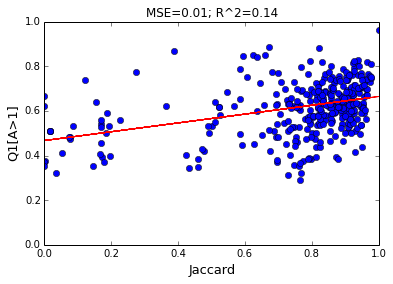

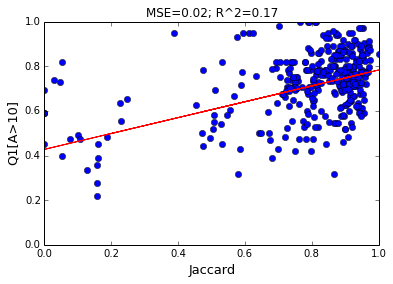

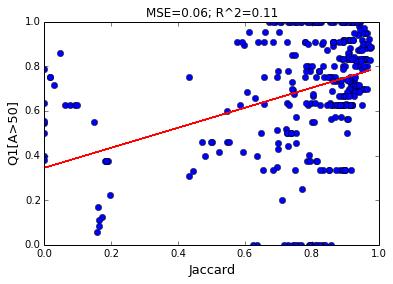

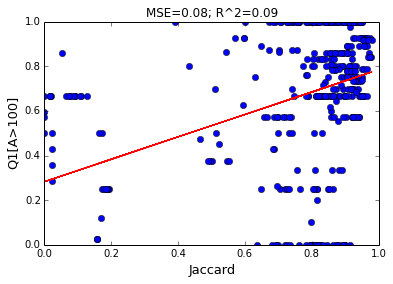

In [70]:
for astar in [1,10,50,100]:
    regression_results( ["Jaccard"],["Q1[A>{}]".format(astar)],PLOT=True)

---------------------------------------------
Regression x=['Jaccard'];y=['Q2[A<1]']
Coefficients:  [[ 0.14642571]]
Mean squared error: 0.01
R^2: 0.10
---------------------------------------------
Regression x=['Jaccard'];y=['Q2[A<10]']
Coefficients:  [[ 0.14350339]]
Mean squared error: 0.01
R^2: 0.12
---------------------------------------------
Regression x=['Jaccard'];y=['Q2[A<50]']
Coefficients:  [[ 0.15505009]]
Mean squared error: 0.01
R^2: 0.07
---------------------------------------------
Regression x=['Jaccard'];y=['Q2[A<100]']
Coefficients:  [[ 0.16350356]]
Mean squared error: 0.01
R^2: 0.04


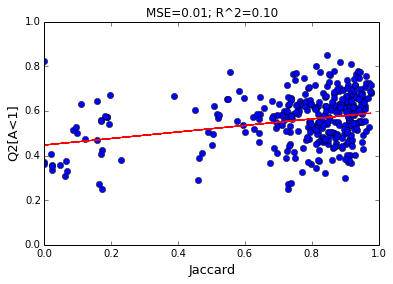

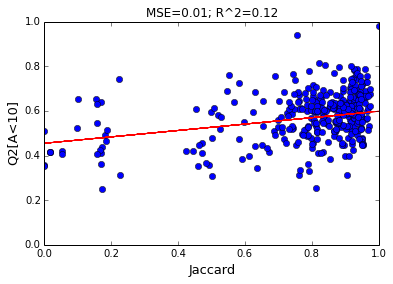

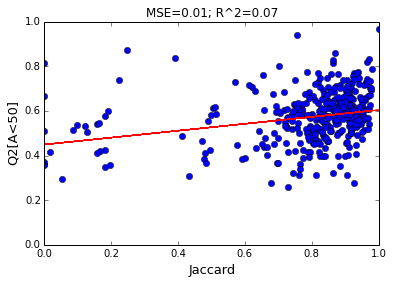

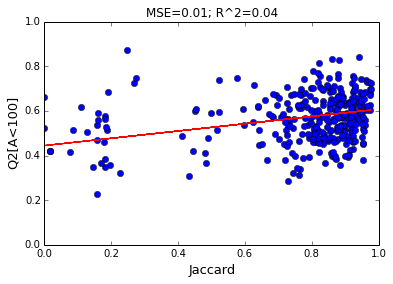

In [68]:
for astar in [1,10,50,100]:
    regression_results( ["Jaccard"],["Q2[A<{}]".format(astar)],PLOT=True)

### Error rate in retreiving good and bad workers as a function of a*

A worker is defined as a good worker if jaccard > 0.5

In [95]:
df["goodworker"]=df["Jaccard"]>0.5

In [96]:
# Ngoodworkers=df[df["Jaccard"]>0.5].count(axis=0)[0]

In [113]:
p_lst = []
r_lst=[]
astar_lst=[1,10,50,100]
for astar in astar_lst:
    true_positives = len(df[(df["Q1[A>{}]".format(astar)]>0.7)&(df["goodworker"]==True)])
    false_negatives = len(df[(df["Q1[A>{}]".format(astar)]<0.7)&(df["goodworker"]==True)])
    false_positives = len(df[(df["Q1[A>{}]".format(astar)]>0.7)&(df["goodworker"]==False)])
    true_negatives = len(df[(df["Q1[A>{}]".format(astar)]>0.7)&(df["goodworker"]==False)])
    precision = true_positives/float(true_positives+false_positives)
    recall = true_positives/float(true_positives+false_negatives)
    p_lst.append(precision)
    r_lst.append(recall)

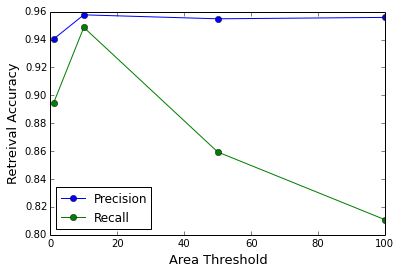

In [111]:
plt.plot(astar_lst,p_lst,'o-',label="Precision")
plt.plot(astar_lst,r_lst,'o-',label="Recall")
plt.xlabel("Area Threshold",fontsize=13)
plt.ylabel("Retreival Accuracy",fontsize=13)
plt.legend(loc="bottom left",numpoints=1)

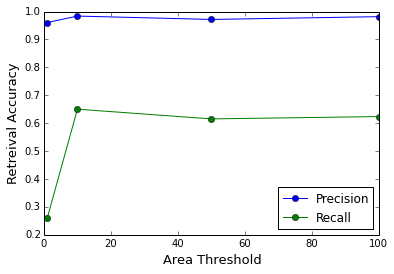

In [114]:
plt.plot(astar_lst,p_lst,'o-',label="Precision")
plt.plot(astar_lst,r_lst,'o-',label="Recall")
plt.xlabel("Area Threshold",fontsize=13)
plt.ylabel("Retreival Accuracy",fontsize=13)
plt.legend(loc="bottom left",numpoints=1)

$\therefore$ maybe we need to explore lower area thresholds 

------------------------------------------------------------------------------------

In [33]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
def regression_results(x_attr,y_attr,PLOT=False,normScale=False):
    print "---------------------------------------------"
    print "Regression x={0};y={1}".format(x_attr,y_attr)
    regr = linear_model.LinearRegression()
    msk = np.random.rand(len(df)) < 0.8
    Xtrain = df[x_attr][msk].as_matrix()
    Xtest = df[x_attr][~msk].as_matrix()
    if normScale:
        Xtrain = StandardScaler().fit_transform(Xtrain)
        Xtest = StandardScaler().fit_transform(Xtest)
    
    Ytrain = df[y_attr][msk].as_matrix()
    Ytest = df[y_attr][~msk].as_matrix()
    regr.fit(Xtrain,Ytrain)
    # The coefficients
    print 'Coefficients: ', regr.coef_
    # The mean squared error
    print("Mean squared error: %.2f"
          % np.mean((regr.predict(Xtest) - Ytest) ** 2))
    print('R^2: %.2f' % regr.score(Xtest, Ytest))
    if PLOT:
        plt.figure()
        plt.plot(Xtest,Ytest,'o')
        plt.plot(Xtest,regr.predict(Xtest),'r-')
        plt.ylim(0,1)
        plt.title("MSE=%.2f"% np.mean((regr.predict(Xtest) - Ytest) ** 2)+'; R^2=%.2f' % regr.score(Xtest, Ytest))
        plt.xlabel(x_attr[0],fontsize=13)
        plt.ylabel(y_attr[0],fontsize=13)

---------------------------------------------
Regression x=['Precision'];y=['Q1[A>10]']
Coefficients:  [[ 0.33311591]]
Mean squared error: 0.02
R^2: 0.13


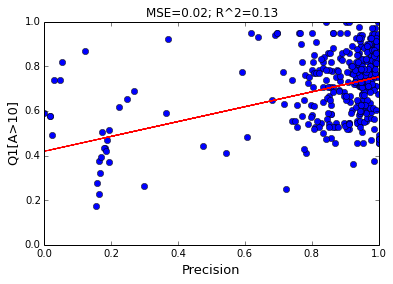

In [15]:
regression_results( ["Precision"],["Q1[A>10]"],PLOT=True)

---------------------------------------------
Regression x=['Recall'];y=['Q1[A>10]']
Coefficients:  [[ 0.19638408]]
Mean squared error: 0.02
R^2: 0.04


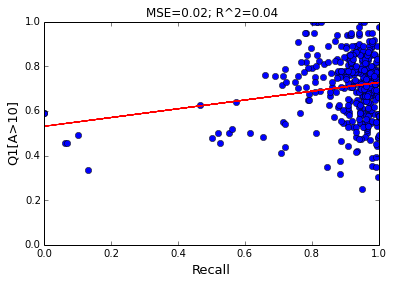

In [14]:
regression_results( ["Recall"],["Q1[A>10]"],PLOT=True)

---------------------------------------------
Regression x=['Precision'];y=['Q2[A<10]']
Coefficients:  [[ 0.14913736]]
Mean squared error: 0.01
R^2: 0.02


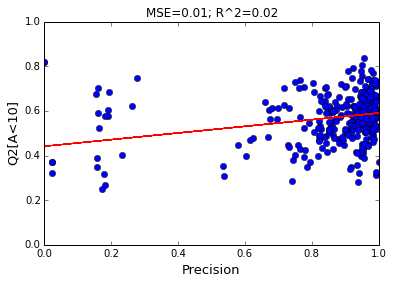

In [17]:
regression_results( ["Precision"],["Q2[A<10]"],PLOT=True)

---------------------------------------------
Regression x=['Recall'];y=['Q2[A<10]']
Coefficients:  [[ 0.05287853]]
Mean squared error: 0.01
R^2: 0.01


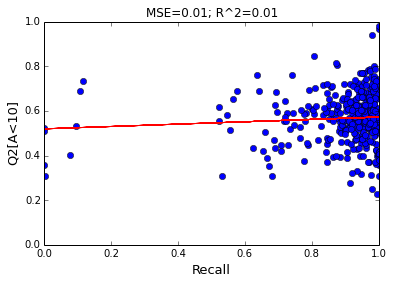

In [18]:
regression_results( ["Recall"],["Q2[A<10]"],PLOT=True)

---------------------------------------------
Regression x=['Q1[A>10]'];y=['Precision']
Coefficients:  [[ 0.58384363]]
Mean squared error: 0.03
R^2: 0.22
---------------------------------------------
Regression x=['Q1[A>10]'];y=['Recall']
Coefficients:  [[ 0.21455652]]
Mean squared error: 0.02
R^2: 0.03
---------------------------------------------
Regression x=['Q2[A<10]'];y=['Precision']
Coefficients:  [[ 0.49238106]]
Mean squared error: 0.04
R^2: 0.05
---------------------------------------------
Regression x=['Q2[A<10]'];y=['Recall']
Coefficients:  [[ 0.11808577]]
Mean squared error: 0.02
R^2: 0.01
---------------------------------------------
Regression x=['Qj'];y=['Precision']
Coefficients:  [[ 0.48679173]]
Mean squared error: 0.02
R^2: 0.07
---------------------------------------------
Regression x=['Qj'];y=['Recall']
Coefficients:  [[ 0.09562859]]
Mean squared error: 0.02
R^2: 0.02


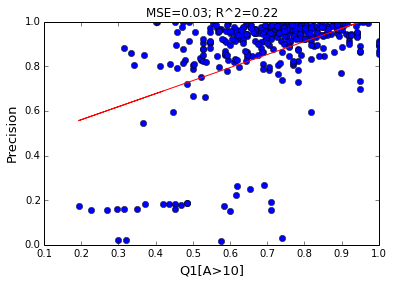

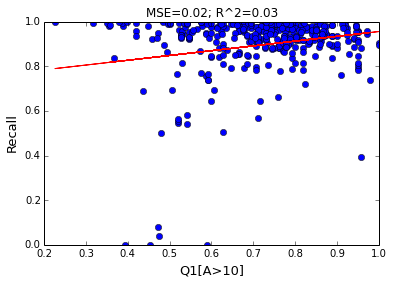

In [23]:
regression_results(["Q1[A>10]"], ["Precision"],PLOT=True)
regression_results(["Q1[A>10]"], ["Recall"],PLOT=True)
regression_results(["Q2[A<10]"], ["Precision"])
regression_results(["Q2[A<10]"], ["Recall"])
regression_results(["Qj"], ["Precision"])
regression_results(["Qj"], ["Recall"])

In [24]:
def plot_attr_histo(attr):
    data = df[attr]
    a = plt.hist(data,bins=50,normed=True)
    avg = np.mean(data)
    var = np.var(data)
    plt.title("Normalized {0} distribution [N={1}; bins=50]".format(attr,len(data)))
    plt.suptitle("mu={0:.3f};std={1:.3f}".format(avg,var))
    pdf_x = np.linspace(np.min(data),np.max(data),100)
    pdf_y = 1.0/np.sqrt(2*np.pi*var)*np.exp(-0.5*(pdf_x-avg)**2/var)
    plt.plot(pdf_x,pdf_y,'--',color='red',linewidth=3)

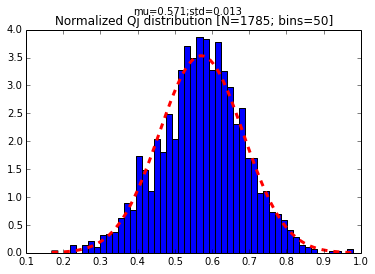

In [25]:
plot_attr_histo("Qj")

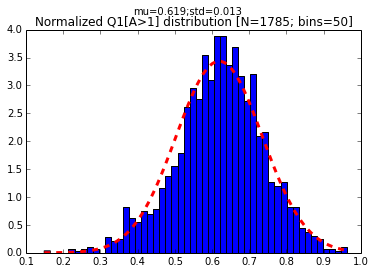

In [33]:
plot_attr_histo("Q1[A>1]")

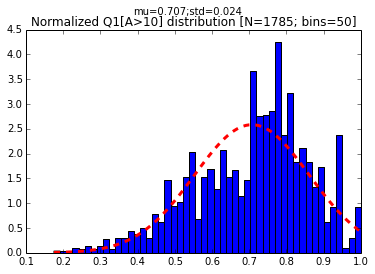

In [26]:
plot_attr_histo("Q1[A>10]")

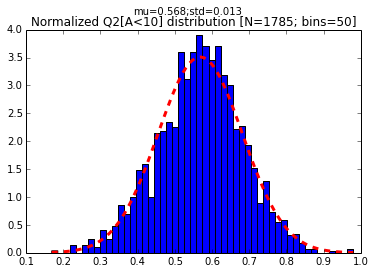

In [27]:
plot_attr_histo("Q2[A<10]")

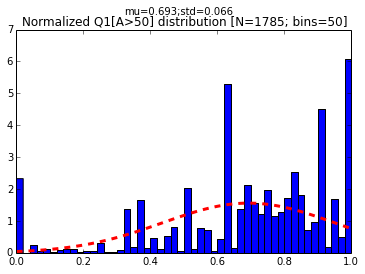

In [30]:
plot_attr_histo("Q1[A>50]")

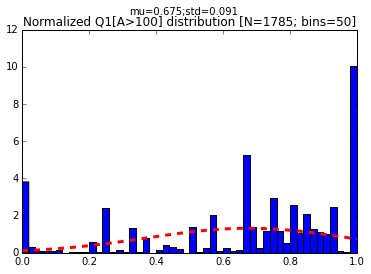

In [29]:
plot_attr_histo("Q1[A>100]")

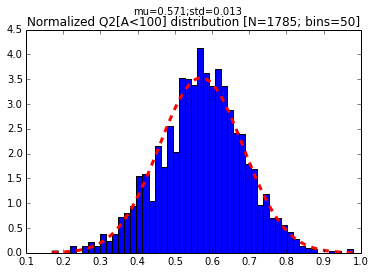

In [28]:
plot_attr_histo("Q2[A<100]")

# p(T')

In [70]:
df = pd.read_csv("../final_all_tiles/obj1to31_tile_combo_metric_area.csv",index_col=0)

In [71]:
df =df[df["Precision"]!=-1]
df =df[df["Recall"]!=-1]

In [72]:
df = df.drop("Average gamma value",axis=1)
df = df.drop("Total gamma value",axis=1)

In [73]:
correlation = df[df.keys()[2:]].corr('pearson')
correlation

,Total Votes,Average Votes,Total area,Average area,pTprime,pTprime[Athres>1],pTprime[Athres>10],pTprime[Athres>50],pTprime[Athres>100],Precision,Recall
Total Votes,1.000000,0.244587,0.512015,0.003388,-0.169970,-0.169221,-0.081206,-0.119638,-0.100339,0.436324,0.537697
Average Votes,0.244587,1.000000,-0.111278,0.022598,-0.116598,-0.157698,0.071786,-0.219025,-0.173805,0.498371,0.016804
Total area,0.512015,-0.111278,1.000000,0.574823,-0.105635,-0.104679,-0.052472,-0.072428,-0.060632,0.560214,0.859186
Average area,0.003388,0.022598,0.574823,1.000000,-0.055996,-0.056368,-0.031553,-0.037294,-0.028441,0.360825,0.516359
pTprime,-0.169970,-0.116598,-0.105635,-0.055996,1.000000,0.979260,0.137990,0.859810,0.789251,-0.147545,-0.105627
pTprime[Athres>1],-0.169221,-0.157698,-0.104679,-0.056368,0.979260,1.000000,0.163127,0.871491,0.757130,-0.176839,-0.104701
pTprime[Athres>10],-0.081206,0.071786,-0.052472,-0.031553,0.137990,0.163127,1.000000,0.138147,0.115749,0.000526,-0.051811
pTprime[Athres>50],-0.119638,-0.219025,-0.072428,-0.037294,0.859810,0.871491,0.138147,1.000000,0.960122,-0.191510,-0.072647
pTprime[Athres>100],-0.100339,-0.173805,-0.060632,-0.028441,0.789251,0.757130,0.115749,0.960122,1.000000,-0.151089,-0.060847
Precision,0.436324,0.498371,0.560214,0.360825,-0.147545,-0.176839,0.000526,-0.191510,-0.151089,1.000000,0.724398


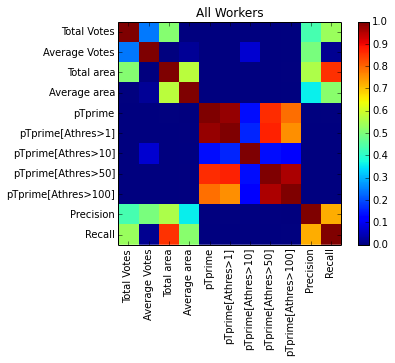

In [74]:
plt.imshow(correlation.as_matrix(),interpolation="None")
ticks=np.arange(0,shape(correlation)[0])
plt.xticks(ticks, df.keys()[2:], rotation='vertical')
plt.yticks(ticks, df.keys()[2:], rotation='horizontal')
plt.colorbar()
plt.clim(0,1)
plt.title("All Workers")

In [164]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
def regression_results(x_attr,y_attr,PLOT=False,normScale=False):
    print "---------------------------------------------"
    print "Regression x={0};y={1}".format(x_attr,y_attr)
    regr = linear_model.LinearRegression()
    msk = np.random.rand(len(df)) < 0.8
    Xtrain = df[x_attr][msk].as_matrix()
    Xtest = df[x_attr][~msk].as_matrix()
    if normScale:
        Xtrain = StandardScaler().fit_transform(Xtrain)
        Xtest = StandardScaler().fit_transform(Xtest)
    
    Ytrain = df[y_attr][msk].as_matrix()
    Ytest = df[y_attr][~msk].as_matrix()
    regr.fit(Xtrain,Ytrain)
    # The coefficients
    print 'Coefficients: ', regr.coef_
    # The mean squared error
    print("Mean squared error: %.2f"
          % np.mean((regr.predict(Xtest) - Ytest) ** 2))
    print('R^2: %.2f' % regr.score(Xtest, Ytest))
    if PLOT:
        plt.figure()
        plt.plot(Xtest,Ytest,'o')
        plt.plot(Xtest,regr.predict(Xtest),'r-')
        plt.ylim(0,1)
        plt.title("MSE=%.2f"% np.mean((regr.predict(Xtest) - Ytest) ** 2)+'; R^2=%.2f' % regr.score(Xtest, Ytest))
        plt.xlabel(x_attr[0],fontsize=13)
        plt.ylabel(y_attr[0],fontsize=13)

---------------------------------------------
Regression x=['pTprime'];y=['Precision']
Coefficients:  [[-3071282.49042516]]
Mean squared error: 0.06
R^2: 0.03


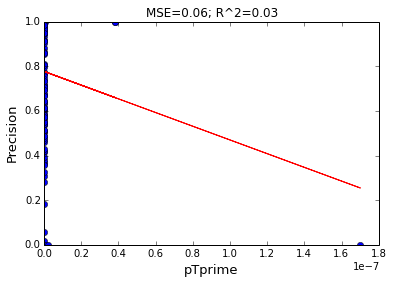

In [165]:
x_attr = ["pTprime"]
y_attr = ["Precision"]
regression_results(x_attr,y_attr,PLOT=True)

---------------------------------------------
Regression x=['pTprime[Athres>100]'];y=['Precision']
Coefficients:  [[-32.06202935]]
Mean squared error: 0.06
R^2: -0.01


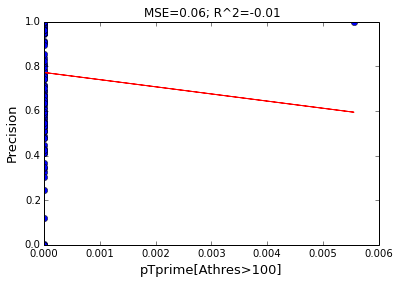

In [167]:
x_attr = ["pTprime[Athres>100]"]
y_attr = ["Precision"]
regression_results(x_attr,y_attr,PLOT=True)